In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor , GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt


ya quedo

In [2]:
df=pd.read_csv('Obesity_Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Sex                                1610 non-null   int64
 1   Age                                1610 non-null   int64
 2   Height                             1610 non-null   int64
 3   Overweight_Obese_Family            1610 non-null   int64
 4   Consumption_of_Fast_Food           1610 non-null   int64
 5   Frequency_of_Consuming_Vegetables  1610 non-null   int64
 6   Number_of_Main_Meals_Daily         1610 non-null   int64
 7   Food_Intake_Between_Meals          1610 non-null   int64
 8   Smoking                            1610 non-null   int64
 9   Liquid_Intake_Daily                1610 non-null   int64
 10  Calculation_of_Calorie_Intake      1610 non-null   int64
 11  Physical_Excercise                 1610 non-null   int64
 12  Schedule_Dedicated_t

In [4]:
df.head(3)

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2


In [5]:
df['Overweight_Obese_Family'].corr(df['Frequency_of_Consuming_Vegetables'])

0.24409990472423207

In [6]:
df['Overweight_Obese_Family'].corr(df['Consumption_of_Fast_Food'])

0.2557966429985835

<Axes: xlabel='Consumption_of_Fast_Food', ylabel='Age'>

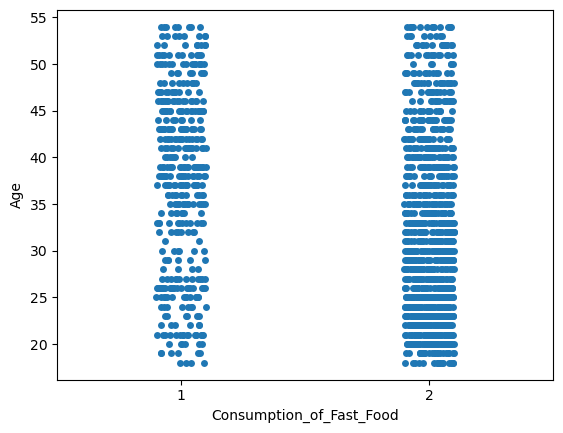

In [18]:
sns.stripplot(y='Age',x='Consumption_of_Fast_Food',data=df)

In [21]:
df[df['Consumption_of_Fast_Food']==1].groupby('Sex').agg({'Consumption_of_Fast_Food':'count'}).reset_index()

,Sex,Consumption_of_Fast_Food
0,1,214
1,2,222


In [22]:
df[df['Frequency_of_Consuming_Vegetables']==1].groupby('Overweight_Obese_Family').agg({'Consumption_of_Fast_Food':'count'}).reset_index()

,Overweight_Obese_Family,Consumption_of_Fast_Food
0,1,140
1,2,260


In [24]:
df[df['Overweight_Obese_Family']==1].groupby('Number_of_Main_Meals_Daily').agg({'Overweight_Obese_Family':'count'}).reset_index()

,Number_of_Main_Meals_Daily,Overweight_Obese_Family
0,1,54
1,2,122
2,3,90


In [25]:
df[df['Overweight_Obese_Family']==1].groupby('Physical_Excercise').agg({'Overweight_Obese_Family':'count'}).reset_index()

,Physical_Excercise,Overweight_Obese_Family
0,1,28
1,2,32
2,3,34
3,4,52
4,5,120


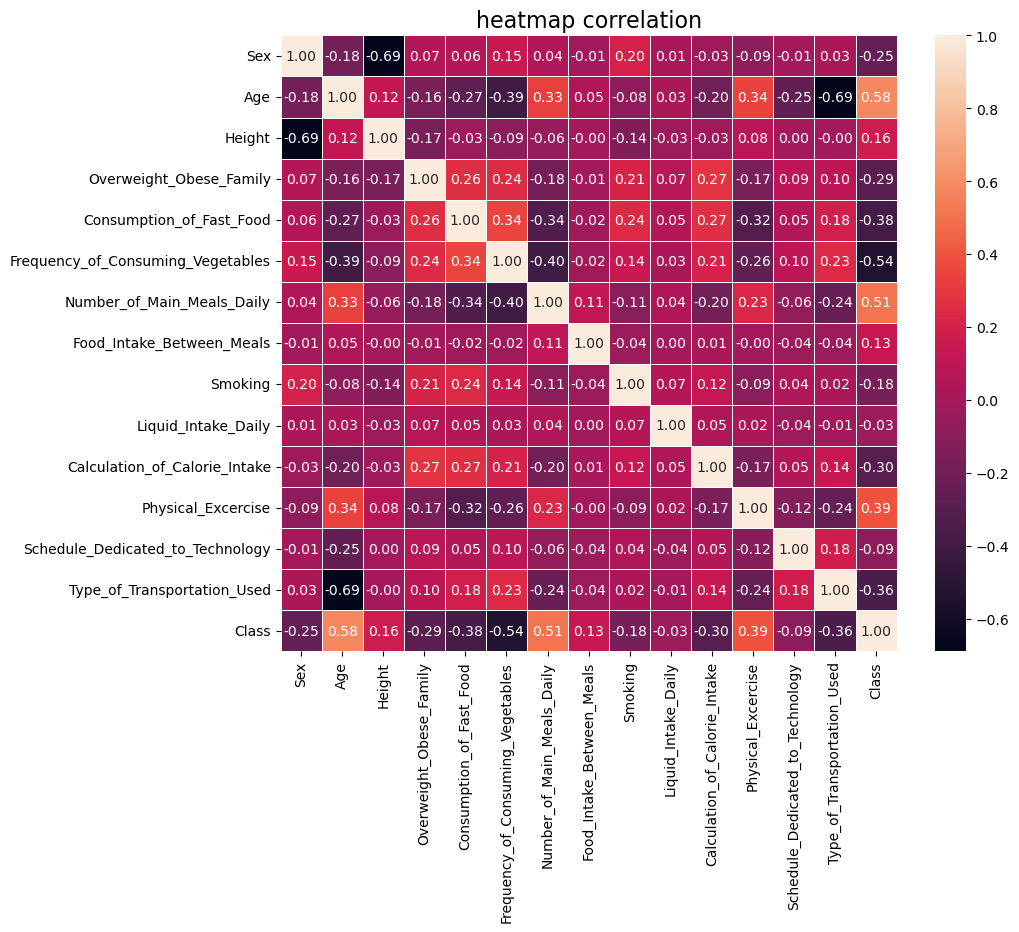

In [30]:
corrm = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrm, annot = True, square=True,fmt=".2f",linewidths=0.5,linecolor='white')
plt.title('heatmap correlation',fontsize=16)
plt.show()

In [31]:
df.head(2)

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2


In [37]:
X=df[['Sex','Age','Height','Overweight_Obese_Family','Consumption_of_Fast_Food','Frequency_of_Consuming_Vegetables','Number_of_Main_Meals_Daily','Food_Intake_Between_Meals','Food_Intake_Between_Meals','Smoking','Liquid_Intake_Daily','Calculation_of_Calorie_Intake',
      'Physical_Excercise','Schedule_Dedicated_to_Technology','Type_of_Transportation_Used']]
y=df['Class']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2)
model=LinearRegression()
model.fit(X_train,y_train) 
y_predict=model.predict(X_test)

r2=r2_score(y_predict,y_test)
square=mean_squared_error(y_test,y_predict)

print(r2)
print(square)

0.2727245194202649
0.28652996057938834


In [40]:
new=[[1,24,178,1,2,3,2,1,2,3,2,3,3,2,1]]


neq=model.predict(new)
print(neq)

[1.78570058]


c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [62]:
X=df.drop(columns=['Class'])
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st =  scaler.transform(X_test)
models = [LogisticRegression(),RandomForestClassifier()]


In [65]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Exactitud:{:.2f} Precisión:{:.2f} Recall:{:.2f}'.format(accuracy_score(y_test, y_pred), 
                                          precision_score(y_test, y_pred,average='weighted'),
                                                                    recall_score (y_test, y_pred,average='weighted')))
 
    


In [66]:
for pronostico in models:
    print(pronostico)
    make_prediction(m=pronostico,X_train = X_train_st, y_train= y_train,
                    X_test=X_test_st, y_test = y_test)
    

LogisticRegression()
Exactitud:0.70 Precisión:0.69 Recall:0.70
RandomForestClassifier()
Exactitud:0.86 Precisión:0.86 Recall:0.86


In [3]:
df.head(2)

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2


In [6]:
def gastos (df,sex,age):
    se=df[df['Sex']==sex]
    edad=se[se['Age']==age]
    traer=edad.sort_values(by='Schedule_Dedicated_to_Technology',ascending=False).head(10)
    new_data=traer[['Height','Overweight_Obese_Family','Consumption_of_Fast_Food','Number_of_Main_Meals_Daily','Smoking','Schedule_Dedicated_to_Technology','Type_of_Transportation_Used']]
    return new_data

In [7]:
gastos(df,2,24)

,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Number_of_Main_Meals_Daily,Smoking,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used
919,159,2,2,1,2,3,4
920,158,2,2,2,2,3,5
937,175,2,2,1,2,3,4
928,162,2,2,1,2,2,3
921,157,2,2,2,2,2,4
922,158,1,2,2,2,2,4
923,159,2,2,2,2,2,3
924,160,2,2,3,2,2,4
925,162,2,2,2,2,2,3
926,160,2,2,1,2,2,4
